In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pycountry
import pycountry_convert as pc
from scipy import stats

# Loading Data

## Gross Domestic Product

In [116]:
#countries income group
df_gdp_group = pd.read_csv('data/gdp_group.csv', delimiter =';')
df_gdp_group = df_gdp_group[['TableName', 'IncomeGroup']]
df_gdp_group.columns = ['pais', 'IncomeGroup']

#gdp percapita
df_gdp_pc = pd.read_csv('data/gdp_percapita.csv', delimiter =';', dtype={'2018': np.float32})
df_gdp_pc.columns = ['pais', 'gdp_pc']

#gdp
df_gdp = pd.read_csv('data/gdp_values.csv', delimiter =';', dtype={'2018': np.float32})
df_gdp.columns = ['pais', 'gdp']

## Flights Percent Loss

In [214]:
df_pct_loss = pd.read_csv('data/flights_pct_loss_week5-22.csv')

In [215]:
df_pct_loss = df_pct_loss[(df_pct_loss.valor_semana >=15) & (df_pct_loss.valor_semana <=22)]

In [216]:
df_pct_loss = df_pct_loss[['pais', 'pct_loss']].groupby(['pais']).mean().reset_index()

In [217]:
df_pct_loss

,pais,pct_loss
0,Algeria,0.907910
1,Argentina,0.907540
2,Armenia,0.903259
3,Australia,0.595010
4,Austria,0.858880
...,...,...
66,Turkey,0.862534
67,Ukraine,0.884646
68,United Arab Emirates,0.840435
69,United Kingdom,0.833206


## Economic Impact

In [218]:
df_eco_impct = pd.read_csv('data/all_variables_response_economic_countries.csv')
df_eco_impct = df_eco_impct[['Country', 'Output-CLI percent impact']]
df_eco_impct.columns = ['pais', 'Output-CLI percent impact']

## Population

In [219]:
df_pop = pd.read_csv('data/socio_stats_countries.csv')

df_pop = df_pop[df_pop.variable == 'Population']
df_pop = df_pop[['Name', 'value']]
df_pop.columns = ['pais', 'pop']

## Export Goods and Services

In [220]:
df_goods_serv = pd.read_csv('data/export_goods_serv.csv', delimiter =';', dtype={'2018': np.float32}, encoding='cp1252')
df_goods_serv.columns = ['pais', 'value_goods_serv']

## Covid Deaths

In [221]:
df_covid = pd.read_csv('data/total_cases_countries_normalized.csv')
df_covid = df_covid[df_covid.Date == '2020-05-18']
df_covid = df_covid[['Name', 'TotalDeaths']]
df_covid.columns = ['pais', 'TotalDeaths05/18']


# 1st  Occurrence of Covid

In [222]:
covid = pd.read_csv('data/total_cases_countries_normalized.csv')

In [223]:
first_date = []

for pais in covid.Name.unique():
    auxdf = covid[covid.Name == pais]
    auxdf = auxdf[auxdf.TotalDeaths != 0]
    if not(auxdf.empty):
        fd = auxdf.iloc[0].Day
    first_date.append([pais, fd])
df_first_date = pd.DataFrame(first_date, columns = ['pais', '1stDay' ])

## Eigenvector Centrality

In [224]:
df_eigenvec = pd.read_csv('data/eigenvector_centrality.csv')
df_eigenvec.columns = ['pais', 'centrality']

## Target Probabilty

In [225]:
df_target_prob = pd.read_csv('data/probability_matrix.csv')
df_target_prob = df_target_prob[['target', 'prob']].groupby('target').mean().reset_index()

In [226]:
df_target_prob.columns = ['pais', 'prob_target']

## Coordinates

In [227]:
df_lat_long = pd.read_csv('data/lat-long.csv', delimiter = ';')
df_lat_long = df_lat_long[['name', 'latitude', 'longitude']]
df_lat_long.columns = ['pais', 'lat', 'long']

## Solving country names problem

In [228]:
#Hong Kong Macau Russia Slovakia South Korea Taiwan

def rename_dataworldbank(d):
    d = d.set_index('pais')
    d = d.rename(index ={'Hong Kong SAR, China':'Hong Kong'})
    d = d.rename(index ={'Macao SAR, China':'Macau'})
    d = d.rename(index ={'Russian Federation':'Russia'})
    d = d.rename(index ={'Slovak Republic':'Slovakia'})
    d = d.rename(index ={'Korea, Rep.':'South Korea'})
    d = d.reset_index()
    return d

df_gdp = rename_dataworldbank(df_gdp)
df_gdp_pc = rename_dataworldbank(df_gdp_pc)
df_goods_serv = rename_dataworldbank(df_goods_serv)


## Merging DataFrames

In [229]:
df = df_pct_loss.merge(df_gdp_group, 'left', on = 'pais')
df = df.merge(df_gdp, 'left', on = 'pais')
df = df.merge(df_gdp_pc, 'left', on = 'pais')
df = df.merge(df_eco_impct, 'left', on = 'pais')
df = df.merge(df_pop, 'left', on = 'pais')
df = df.merge(df_goods_serv, 'left', on = 'pais')
df = df.merge(df_covid, 'left', on = 'pais')
df = df.merge(df_first_date, 'left', on = 'pais')
df = df.merge(df_eigenvec, 'left', on = 'pais')
df = df.merge(df_target_prob, 'left', on = 'pais')
df = df.merge(df_lat_long, 'left', on = 'pais')

In [230]:
paises = df.pais
mapping = {country.name: country.alpha_3 for country in pycountry.countries}
cod_pais = [mapping.get(x) for x in paises]

In [231]:
df['cod_pais'] = cod_pais

## Getting Continent Column

In [232]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['continent'] = df['pais'].apply(lambda x: country_to_continent(x))

In [233]:
req_paises = ['Bolivia', 'Czech Republic', 'Macau', 'Russia', 'South Korea', 'Taiwan']
cods = ['BOL', 'CZE', 'MAC', 'RUS', 'KOR', 'TWN']
#df = df.set_index('pais')

df['cod_pais'].loc['Bolivia'] = 'BOL'
df['cod_pais'].loc['Czech Republic'] = 'CZE'
df['cod_pais'].loc['Macau'] = 'MAC'
df['cod_pais'].loc['Russia'] = 'RUS'
df['cod_pais'].loc['South Korea'] = 'KOR'
df['cod_pais'].loc['Taiwan'] = 'TWN'

In [234]:
df.pct_loss = df.pct_loss*100

# Plots

In [235]:
import folium

country_geo = 'data/world-countries.json'

m = folium.Map()
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_geo,
    name='choropleth COVID-19',
    data=df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['cod_pais', 'pct_loss'],
    key_on='feature.id',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)

In [236]:
#m.save('world-pct_loss.html')
m

In [237]:
df.nlargest(10, 'gdp')

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths05/18,1stDay,centrality,prob_target,lat,long,cod_pais,continent
70,United States,53.207136,High income,2.050000e+13,6.279459e+09,1.749506,3.266875e+08,2.501310e+12,89562.0,61.0,0.145227,0.171243,37.090240,-95.712891,USA,North America
13,China,30.871442,Upper middle income,1.360000e+13,9.770847e+09,1.640852,1.392730e+09,2.651010e+12,4638.0,11.0,0.096098,0.004609,35.861660,104.195397,CHN,Asia
34,Japan,71.452025,High income,4.970000e+12,3.928996e+09,1.623814,1.265291e+08,9.293600e+11,749.0,44.0,0.116034,0.020682,36.204824,138.252924,JPN,Asia
24,Germany,72.022900,High income,3.950000e+12,4.760303e+09,5.248947,8.290578e+07,1.876900e+12,7935.0,70.0,0.145200,0.080236,51.165691,10.451526,DEU,Europe
69,United Kingdom,83.320592,High income,2.860000e+12,4.294390e+09,7.390182,6.646034e+07,8.757610e+11,34636.0,67.0,0.145363,0.101323,55.378051,-3.435973,GBR,Europe
22,France,84.713355,High income,2.780000e+12,4.146364e+09,6.520510,6.697711e+07,9.052890e+11,28108.0,46.0,0.145617,0.053842,46.227638,2.213749,FRA,Europe
29,India,94.812475,Lower middle income,2.720000e+12,2.009979e+09,4.652658,1.352617e+09,5.370420e+11,3029.0,73.0,0.130890,0.040967,20.593684,78.962880,IND,Asia
33,Italy,87.089787,High income,2.080000e+12,3.448320e+07,4.068059,6.042176e+07,6.559120e+11,31908.0,54.0,0.142501,0.040350,41.871940,12.567380,ITA,Europe
11,Brazil,84.834826,Upper middle income,1.870000e+12,8.920762e+09,5.880663,2.094693e+08,2.749770e+11,16118.0,78.0,0.107166,0.034008,-14.235004,-51.925280,BRA,South America
12,Canada,74.673963,High income,1.710000e+12,4.623299e+09,2.116261,3.705776e+07,5.504510e+11,5782.0,70.0,0.131519,0.026760,56.130366,-106.346771,CAN,North America


In [238]:
df.nsmallest(10, 'gdp')

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths05/18,1stDay,centrality,prob_target,lat,long,cod_pais,continent
7,Barbados,94.939439,High income,5.145000e+09,1.794928e+09,NaN,286641.0,NaN,7.0,97.0,0.035372,0.081896,13.193887,-59.543198,BRB,North America
2,Armenia,90.325946,Upper middle income,1.243309e+10,4.212071e+09,NaN,2951776.0,4.700349e+09,60.0,87.0,0.035566,0.000456,40.069099,45.038189,ARM,Asia
40,Malta,86.730309,High income,1.455342e+10,3.009828e+09,NaN,484630.0,2.102934e+10,6.0,100.0,0.115190,0.002541,35.937496,14.375416,MLT,Europe
54,Senegal,82.294712,Lower middle income,2.412960e+10,1.521954e+09,NaN,15854360.0,5.287038e+09,26.0,93.0,0.096723,0.036341,14.497401,-14.452362,SEN,Africa
28,Iceland,71.651308,High income,2.587847e+10,7.319112e+09,1.194950,352721.0,1.224252e+10,10.0,80.0,0.098409,0.003140,64.963051,-19.020835,ISL,Europe
20,Estonia,77.933474,High income,3.073214e+10,2.326635e+09,-1.412185,1321977.0,2.281175e+10,63.0,86.0,0.096465,0.002950,58.595272,25.013607,EST,Europe
36,Latvia,93.416687,High income,3.440923e+10,1.786062e+08,NaN,1927174.0,2.108244e+10,19.0,95.0,0.102359,0.008210,56.879635,24.603189,LVA,Europe
5,Bahrain,77.324627,High income,3.774620e+10,2.405076e+09,NaN,1569439.0,3.009734e+10,12.0,77.0,0.095976,0.010190,25.930414,50.637772,BHR,Asia
10,Bolivia,89.937708,Lower middle income,4.028765e+10,3.548590e+08,NaN,11353142.0,1.035339e+10,169.0,90.0,0.026674,0.007770,-16.290154,-63.588653,None,South America
55,Serbia,85.253903,Upper middle income,5.059729e+10,7.246732e+09,NaN,6982604.0,2.496695e+10,230.0,81.0,0.095028,0.006989,44.016521,21.005859,SRB,Europe


In [239]:
for c in df.columns:
    if c in ['gdp', 'gdp_pc', 'value_goods_serv']:
        df_aux = df[[c, 'pct_loss']].dropna()
        pearson_coef, p_value = stats.pearsonr(df_aux[c], df_aux.pct_loss)
        
        print('-'* 100)
        print('Correlação pct_loss e {}: {}'.format(c, pearson_coef))
        print('P-value pct_loss e {}: {}'.format(c, p_value))

----------------------------------------------------------------------------------------------------
Correlação pct_loss e gdp: -0.506663854464169
P-value pct_loss e gdp: 8.90710940563895e-06
----------------------------------------------------------------------------------------------------
Correlação pct_loss e gdp_pc: -0.33014405930934376
P-value pct_loss e gdp_pc: 0.005598403269450722
----------------------------------------------------------------------------------------------------
Correlação pct_loss e value_goods_serv: -0.5216778911792016
P-value pct_loss e value_goods_serv: 8.339477526648453e-06


In [240]:
df['gdp_log'] = np.log(df.gdp)
df['gdp_pc_log'] = np.log(df.gdp_pc)
df['goods_sev_log'] = np.log(df.value_goods_serv)
df[['gdp','gdp_log', 'gdp_pc','gdp_pc_log','value_goods_serv','goods_sev_log', 'pop', 'pct_loss']].corr()
plot_corr = df[['gdp','gdp_log', 'gdp_pc','gdp_pc_log','value_goods_serv','goods_sev_log', 'pop', 'pct_loss']]

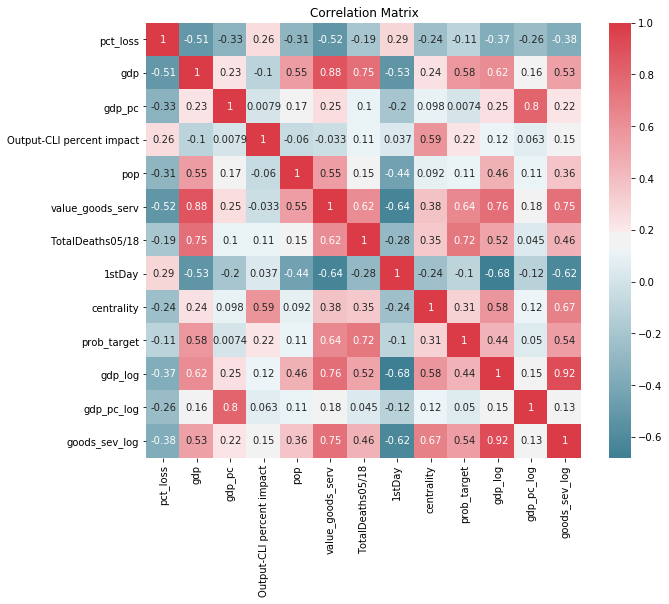

In [241]:
#nao está com log
f, ax = plt.subplots(figsize=(10, 8))
corr = df.drop(['lat', 'long'], axis=1).corr()
f = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

plt.title('Correlation Matrix')
plt.savefig("img/corr_matrix.svg", format="svg")
plt.show()

In [242]:
df.pct_loss.mean()

80.27872668909228

In [243]:
df.nlargest(10, 'pct_loss')

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths05/18,1stDay,centrality,prob_target,lat,long,cod_pais,continent,gdp_log,gdp_pc_log,goods_sev_log
19,Dominican Republic,97.651663,Upper middle income,8.555539e+10,8.050632e+09,NaN,1.062716e+07,2.019170e+10,428.0,81.0,0.038592,0.000779,18.735693,-70.162651,DOM,North America,25.172430,22.809017,23.728537
61,Sri Lanka,95.418869,Upper middle income,8.890077e+10,4.102481e+08,NaN,2.167000e+07,2.026379e+10,9.0,89.0,0.081582,0.002944,7.873054,80.771797,LKA,Asia,25.210787,19.832273,23.732101
7,Barbados,94.939439,High income,5.145000e+09,1.794928e+09,NaN,2.866410e+05,NaN,7.0,97.0,0.035372,0.081896,13.193887,-59.543198,BRB,North America,22.361292,21.308231,NaN
29,India,94.812475,Lower middle income,2.720000e+12,2.009979e+09,4.652658,1.352617e+09,5.370420e+11,3029.0,73.0,0.130890,0.040967,20.593684,78.962880,IND,Asia,28.631653,21.421391,27.009342
65,Thailand,93.629267,Upper middle income,5.050000e+11,7.273563e+09,NaN,6.942852e+07,3.285820e+11,56.0,61.0,0.107106,0.025415,15.870032,100.992541,THA,Asia,26.947824,22.707512,26.518053
36,Latvia,93.416687,High income,3.440923e+10,1.786062e+08,NaN,1.927174e+06,2.108244e+10,19.0,95.0,0.102359,0.008210,56.879635,24.603189,LVA,Europe,24.261591,19.000694,23.771706
58,South Africa,92.468764,Upper middle income,3.680000e+11,6.374028e+09,-0.537225,5.777962e+07,1.100680e+11,264.0,87.0,0.114750,0.030234,-30.559482,22.937506,ZAF,Africa,26.631350,22.575497,25.424364
39,Malaysia,92.069689,Upper middle income,3.590000e+11,1.137323e+07,NaN,3.152858e+07,2.464690e+11,113.0,78.0,0.105052,0.043233,4.210484,101.975766,MYS,Asia,26.606588,16.246773,26.230501
48,Portugal,91.624310,High income,2.410000e+11,2.340791e+09,8.163515,1.028382e+07,1.056780e+11,1218.0,78.0,0.121284,0.020749,39.399872,-8.224454,PRT,Europe,26.208063,21.573755,25.383663
46,Philippines,91.566402,Lower middle income,3.310000e+11,3.102713e+09,NaN,1.066519e+08,9.039707e+10,824.0,33.0,0.105591,0.013855,12.879721,121.774017,PHL,Asia,26.525385,21.855543,25.227478


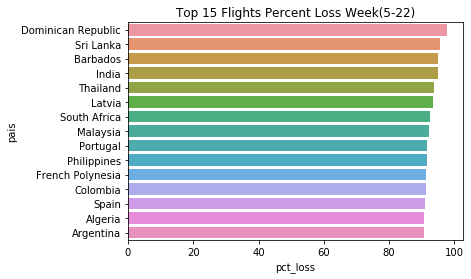

In [244]:
ax = sns.barplot(x = 'pct_loss', y = 'pais', data=df.nlargest(15, 'pct_loss'))
plt.title('Top 15 Flights Percent Loss Week(5-22)')
plt.show()

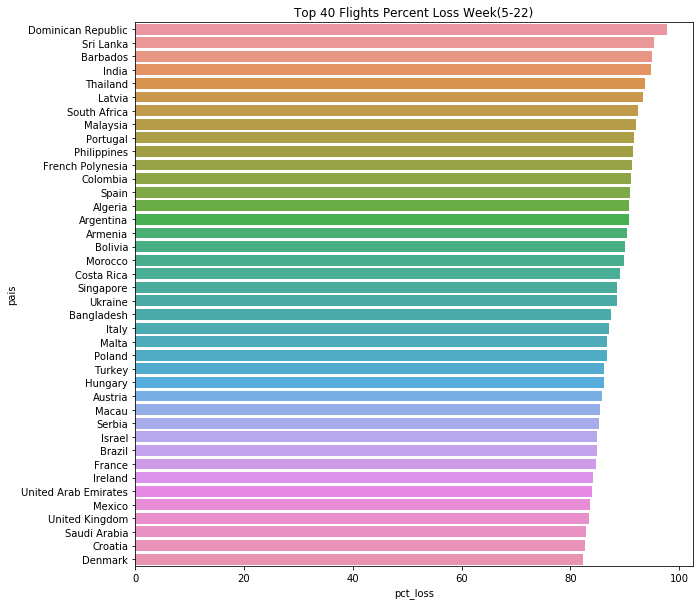

In [245]:
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = 'pct_loss', y = 'pais', data=df.nlargest(40, 'pct_loss'))
plt.title('Top 40 Flights Percent Loss Week(5-22)')
plt.show()

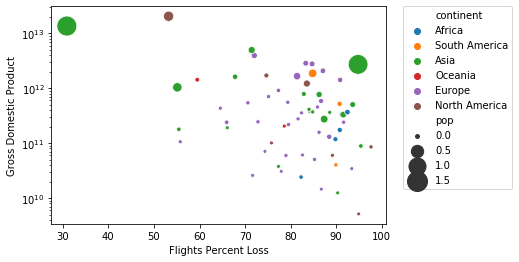

In [246]:
def scatter_func(data, x, y, hue, title, x_label, y_label):
    ax = sns.scatterplot(x = x, y = y, hue = hue, size='pop', sizes=(15, 400), data=data)
    ax.set(xlabel = x_label, ylabel = y_label)
    ax.set(yscale="log")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.title(title)
    plt.savefig("img/scatter-allweks.svg", format="svg")
    plt.show()

scatter_func(df, 'pct_loss', 'gdp', 'continent', 'Flights Percent Loss vs GDP (Week 5-22)', 'Flights Percent Loss', 'Gross Domestic Product')

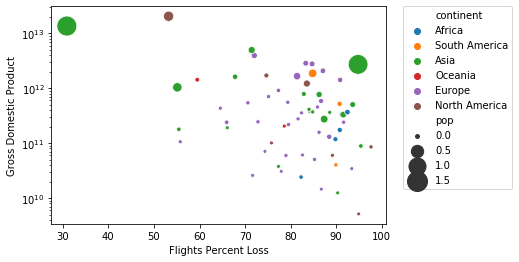

In [247]:
scatter_func(df, 'pct_loss', 'gdp', 'continent', 'Flights Percent Loss vs GDP (Week 5-22)', 'Flights Percent Loss', 'Gross Domestic Product')

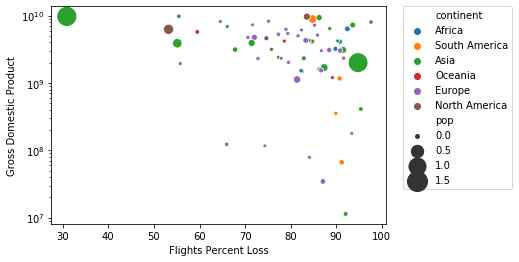

In [248]:
scatter_func(df, 'pct_loss', 'gdp_pc', 'continent', 'Flights Percent Loss vs GDP (Week 5-22)', 'Flights Percent Loss', 'Gross Domestic Product')

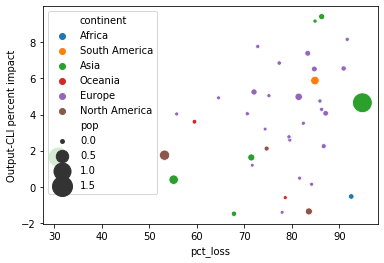

In [249]:
ax = sns.scatterplot(x="pct_loss", y="Output-CLI percent impact", hue="continent", size='pop', sizes=(15, 400), data=df)
plt.show()

In [250]:
#ax = sns.scatterplot(x="pct_loss", y="TotalDeaths31/03", hue="continent", size='pop', sizes=(15, 400), data=df)
#plt.show()

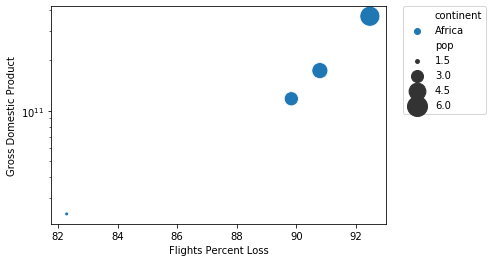

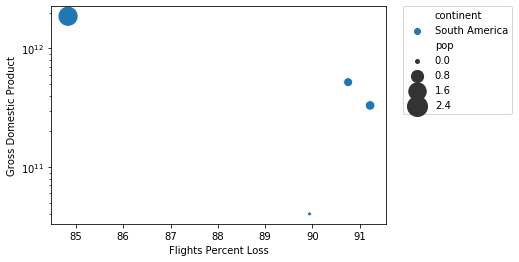

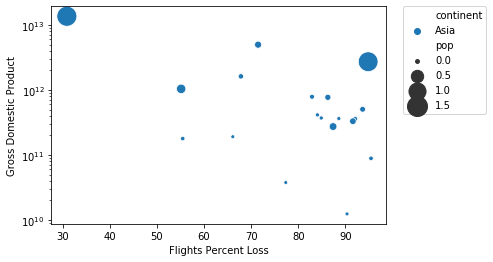

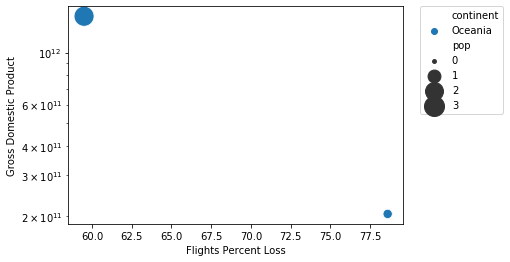

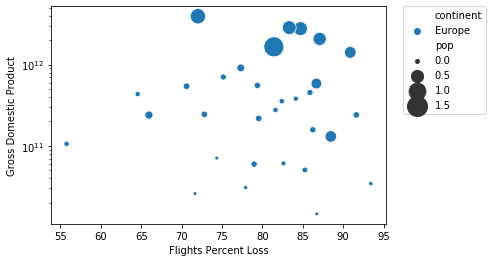

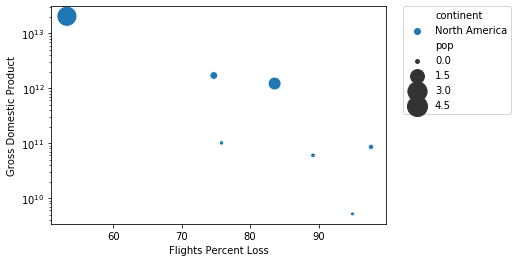

In [251]:
for c in df.continent.unique():
    aux_df = df[df.continent == c]
    scatter_func(aux_df, 'pct_loss', 'gdp', 'continent', c, 'Flights Percent Loss', 'Gross Domestic Product')
    plt.show()